<a href="https://colab.research.google.com/github/hchang18/non-parametric-methods/blob/main/real_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Real Data Analysis using nonparametric testing
### STAT 580 Non parametric methods (Spring 2021) 
### Final Exam

Haeyoon Chang

Analyze the attached dataset (data2.txt). Consider following aspects:
- Provide some fundamental summaries of these two samples, including tests of your conclusions
- Consider the relation between them. If possible, show the relationship in a proper way. 

In [ ]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from scipy.stats import norm, expon

sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# ===================================================
# Import the data from data2.txt                    |
# ===================================================
from google.colab import drive
drive.mount('/content/drive')

# read in file from data1.txt
file = open("/content/drive/MyDrive/Colab Notebooks/data2.txt")
filecontent = file.readlines()
# clean up to make it into list
filecontent = [row.rstrip('\n').lstrip(' ').replace('  ', ' ').split(' ') 
               for row in filecontent]
# change into array (float)
rawdata = np.array(filecontent)

data = rawdata[1:].astype(np.float)
Y = data[:, 0]
X = data[:, 1]
m = len(X)
n = len(Y)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


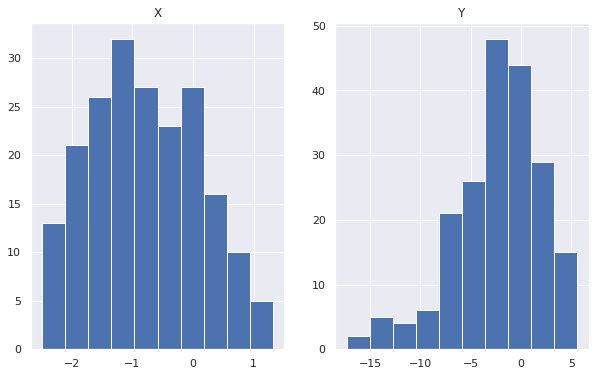

In [ ]:
# Histogram of X and Y
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(X)
ax1.set_title("X")
ax2.hist(Y)
ax2.set_title("Y")
fig.show()

**Fundamental summaries of these two samples**
- test whether two samples have same median

In [ ]:
# Mann Whitney U test 
X_set = set(X)
Y_set = set(Y)
S = np.union1d(X, Y)
N = m + n

U = 0
for x in X:
    for y in Y:
        if x < y:
            U += 1

E_u = m * n / 2
var_u = m * n * (m + n + 1) / 12

z = (U - E_u) / np.sqrt(var_u)

if (z > 1.95 or z < - 1.95):
    print("Reject H0 (medians of two distributions are the same)")
else:
    print("Cannot reject H0 (medians of two distributions are the same)")

Reject H0 (medians of two distributions are the same)


In [ ]:
# Flinger-Policello test
X_set = set(X)
Y_set = set(Y)
S = np.union1d(X, Y)
N = m + n

P_i = []
for x in X:
    count = 0
    for y in Y:
        if y <= x:
            count += 1
    P_i.append(count)

Q_j = []
for y in Y:
    count = 0
    for x in X:
        if x <= y:
            count += 1
    Q_j.append(count)

P_i = np.array(P_i)
Q_j = np.array(Q_j)
P_bar = np.average(P_i)
Q_bar = np.average(Q_j)
V1 = sum((P_i - P_bar)**2)
V2 = sum((Q_j - Q_bar)**2)
U_hat = (sum(Q_j) - sum(P_i))/(2 * np.sqrt(V1 + V2 + P_bar * Q_bar))

if (U_hat > 1.95 or U_hat < - 1.95):
    print("Reject H0 (medians of two distributions are the same)")
else:
    print("Cannot reject H0 (medians of two distributions are the same)")

Reject H0 (medians of two distributions are the same)


**Fundamental summaries of these two samples**
- test whether two samples have same variance

In [ ]:
# test whether the variance of two samples are the same 
# first method - assumption that they have same medians
X_set = set(X)
Y_set = set(Y)
S = np.union1d(X, Y)
N = m + n

# N is odd 
if N % 2 == 1:
    print("N odd")
    # create the grid 
    grid = [i+1 for i in range(int(N/2))]
    reversed_grid = grid[::-1]
    middle = [int((N+1)/2)]
    R = grid + middle + reversed_grid
    S.sort()

    # calculate C
    C = 0
    for k in range(N):
        if S[k] in Y_set:
            C += R[k]

    E_c = (n * (N+1)**2) / (4*N)
    var_c = n * (N-n) * (N+1) * (N**2 + 3) / (48 * N**2)

    Q = (C - E_c) / np.sqrt(var_c)
else:
    print("N even")

    grid = [i+1 for i in range(int(N/2))]
    reversed_grid = grid[::-1]
    R = grid + reversed_grid
    S.sort()

    # calculate C
    C = 0
    for i in range(N):
        if S[i] in Y_set:
            C += R[i]

    E_c = n * (N+2) / 4
    var_c = n * (N-n) * (N+2) * (N-2) / (48*(N-1))

    Q = (C - E_c) / np.sqrt(var_c)

if (Q > 1.95 or Q < - 1.95):
    print("Reject H0 (variances of two distributions are the same)")
else:
    print("Cannot reject H0 (variances of two distributions are the same)")

N even
Reject H0 (variances of two distributions are the same)


In [ ]:
# test whether the variance of two samples are the same 
# second method - relaxed assumption that they have same medians
X_sum = np.full(m, sum(X))
X_s = X_sum - X
X_i_bar = X_s / (m - 1) 
D_i = (X_s - X_i_bar)**2 / (m - 2)

Y_sum = np.full(n, sum(Y))
Y_s = Y_sum - Y
Y_j_bar = Y_s / (n - 1)
E_j = (Y_s - Y_j_bar) ** 2 / (n - 2)

X_0_bar = sum(X) / m
D_0 = sum((X - X_0_bar)**2 / (m-1))

Y_0_bar = sum(Y) / n
E_0 = sum((Y - Y_0_bar)**2 / (n-1))

S_i = np.log(D_i)
T_j = np.log(E_j)
S_0 = np.log(D_0)
T_0 = np.log(E_0)

A_i = m * S_0 - (m - 1) * S_i
B_j = n * T_0 - (n - 1) * T_j

A_bar = sum(A_i) / m
B_bar = sum(B_j) / n

V1 = 1 / (m*(m-1)) * sum((A_i - A_bar)**2)
V2 = 1 / (n*(n-1)) * sum((B_j - B_bar)**2)

Q = (A_bar - B_bar) / np.sqrt(V1 + V2)
print(f"Q: {Q}")

if (Q > 1.95 or Q < - 1.95):
    print("Reject H0 (variances of two distributions are the same)")
else:
    print("Cannot reject H0 (variances of two distributions are the same)")

Q: -644.5561628136352
Reject H0 (variances of two distributions are the same)


**Relation between X and Y** 

Approach: test whether X and Y are independent using Kendall's independence test

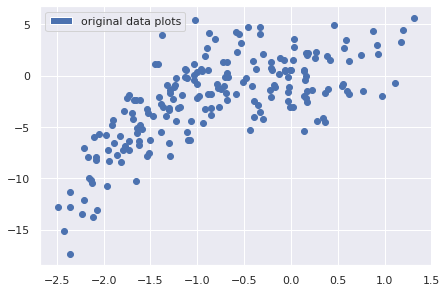

In [ ]:
# X and Y scatter plot
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = (12, 8)

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.scatter(X, Y)
g = ax.grid(True)
leg = mpatches.Patch(color=None, label='original data plots')
ax.legend(handles=[leg])
plt.tight_layout()
plt.show()

In [ ]:
# kendall tau independence

# function to sort the list by X (second item) of tuple
def Sort_Tuple(tup):
    return sorted(tup, key=lambda x: x[1])

# sort the array with X
sorted_data = np.array(Sort_Tuple(data))
X = sorted_data[:, 1]
Y = sorted_data[:, 0]

concordant = 0
discordant = 0

for i in range(n-1):
    for j in range(i+1, n):
        if Y[j] > X[i]:
            concordant += 1
        if Y[j] < Y[i]:
            discordant += 1

tau = (concordant - discordant) / (concordant + discordant)
print(f'tau: {tau}')

tau: 0.41127497621313036


In [ ]:
# source of z calculation: https://www.statology.org/kendalls-tau/
# statistical significance of Kendall's tau
# since n = 200, tau generally follows normal distribution
z = 3 * tau * np.sqrt(n * (n-1)) / np.sqrt(2*(2*n+5))

if (z > 1.95 or z < - 1.95):
    print("Reject H0 (two samples are independent)")
else:
    print("Cannot reject H0 (two samples are independent)")

Reject H0 (two samples are independent)


In [ ]:
# optimal sample size
z_alpha = 1.96
z_beta = 1.96 
min_n = 4 * (z_alpha + z_beta) ** 2 / (9 * tau ** 2)
int(min_n+1)

41

In [ ]:
# package implementation for comparison
from scipy import stats

t, p_value = stats.kendalltau(X, Y)
print(f'tau: {t} and p_value: {p_value}')

tau: 0.5025125628140704 and p_value: 4.221360164238082e-26


**Show the relationship between X and Y** 

Approach: kernel regression estimator with bandwidth chosen from cross validation

In [ ]:
# ============================================
# Kernel Regression Estimator                |
# ============================================
def kernel_regression_estimator(data, kernel_func, bandwidth):
    """ Generate kernel regression estimator over data."""
    X = data[:, 1]
    Y = data[:, 0]
    kernels = dict()
    n = len(X)
    for d in X:
        kernels[d] = kernel_func(d, bandwidth)
    def evaluate(x):
        """Evaluate `x` using kernels above."""
        resp = list()
        weight = list()
        for d in X:
            resp.append(kernels[d](x))
        resp_sum = sum(resp) # denominator
        for i in range(n):
            weight.append(resp[i]/resp_sum)
        result = list()
        for i in range(n):
            result.append(weight[i]*Y[i])
        return sum(result)
    return (evaluate)

In [ ]:
# ============================================
# Gaussian Kernel PDF                        |
# ============================================
def gaussian_pdf(x_i, bandwidth):
    """Return Gaussian kernel density estimator."""
    x_bar  = x_i
    def evaluate(x):
        """Evaluate x."""
        pdf = (np.sqrt(2*np.pi*bandwidth**2)**-1) * np.exp(-((x - x_bar)**2)/(2*bandwidth**2))
        return(pdf)
    return(evaluate)

In [ ]:
from random import seed
from random import randrange

def cross_validation_split(dataset, folds=10):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset)/folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def bundle_test_train_set(dataset, k, test_idx):
    folds = cross_validation_split(dataset, folds=k)
    test = np.array(folds[test_idx])
    
    train = list()
    for i, x in enumerate(folds):
        if i != test_idx:
            train.extend(folds[i])
    train = np.array(train)
    return test, train

In [ ]:
def estimate_bandwidth(data, kernel_function):

    num_samples = len(data[:, 0])
    y = data[:, 0]
    x = data[:, 1]
    # list of bandwidth 
    bandwidths = np.arange(0.01, 2, 0.02)

    # estimate y_hat corresponding to X
    errors = list()
    k = 10
    for h in bandwidths:
        error = 0
        folds = cross_validation_split(data, k)
        for i in range(k):
            test, train = bundle_test_train_set(data, k, i)
            estimator = kernel_regression_estimator(train, kernel_func=kernel_function, bandwidth=h)
            y_hat = [estimator(x) for x in test[:, 1]]
            error += (test[:, 0] - y_hat)**2
        errors.append(sum(error))

    errors = np.array(errors)
    # print(errors)
    # print(min(errors))
    h_opt = bandwidths[np.argmin(errors)]
    return h_opt  

In [ ]:
# =========================================
# kernel density estimates visualizations |
# =========================================
def plot_kre(data, kernel_function):

    seed(2)

    num_samples = len(data[:, 0])
    vals = data[:, 1] # x
    xvals = np.arange(min(vals), max(vals), .01)

    # ========================================================
    # Bandwidth Selection : rule-of-thumb plugin             |
    # ========================================================
    # bandwidth estimation based on kernel function

    if "uniform_pdf" in str(kernel_function):
        sigma_hat = np.std(vals)
        R_k = 1/2
        kappa_2 = 1/3
        h_opt = (((8 * (np.pi**0.5) * R_k) / (3 * kappa_2 * num_samples))**0.2) * sigma_hat 
    
    elif "epanechnikov_pdf" in str(kernel_function):
        sigma_hat = np.std(vals)
        R_k = 3/5
        kappa_2 = 1/5
        h_opt = (((8 * (np.pi**0.5) * R_k) / (3 * kappa_2 * num_samples))**0.2) * sigma_hat 
    
    elif "gaussian_pdf" in str(kernel_function):
        sigma_hat = np.std(vals)
        R_k = 1 / (2 * (np.pi**0.5))
        kappa_2 = 1
        h_opt = (((8 * (np.pi**0.5) * R_k) / (3 * kappa_2 * num_samples))**0.2) * sigma_hat 

    # ========================================================
    # Bandwidth Selection : cross-validation                 |
    # ========================================================
    h_cv = estimate_bandwidth(data, gaussian_pdf)

    # ========================================================
    # Optimized Bandwidth visualization                      |
    # ========================================================
    fig = plt.figure()

    # bandwidth=optimal_bandwidth_plugin:
    ax4 = fig.add_subplot(2, 2, 1)
    dist_4 = kernel_regression_estimator(data, kernel_func=kernel_function, bandwidth=h_opt)
    y4 = [dist_4(i) for i in xvals]
    ax4.scatter(data[:, 1], data[:, 0])
    ax4.plot(xvals, y4)

    # bandwidth=optimal_bandwidth_crossvalidated:
    ax5 = fig.add_subplot(2, 2, 2)
    dist_5 = kernel_regression_estimator(data, kernel_func=kernel_function, bandwidth=h_cv)
    y5 = [dist_5(i) for i in xvals]
    ax5.scatter(data[:, 1], data[:, 0])
    ax5.plot(xvals, y5)

    # display gridlines 
    g4 = ax4.grid(True)
    g5 = ax5.grid(True)

    # display legend in each subplot
    leg4 = mpatches.Patch(color=None, label=f'plug-in bandwidth={h_opt}')
    leg5 = mpatches.Patch(color=None, label=f'cross-validated bandwidth={h_cv}')

    ax4.legend(handles=[leg4])
    ax5.legend(handles=[leg5])

    plt.tight_layout()
    plt.show()

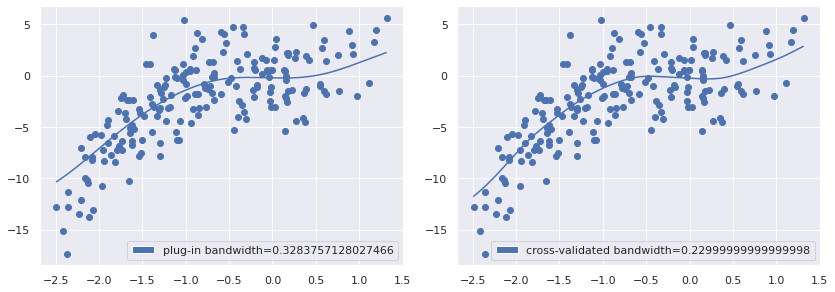

In [ ]:
plot_kre(data, gaussian_pdf)